In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
# Class names mapping
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [6]:
import numpy as np


In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

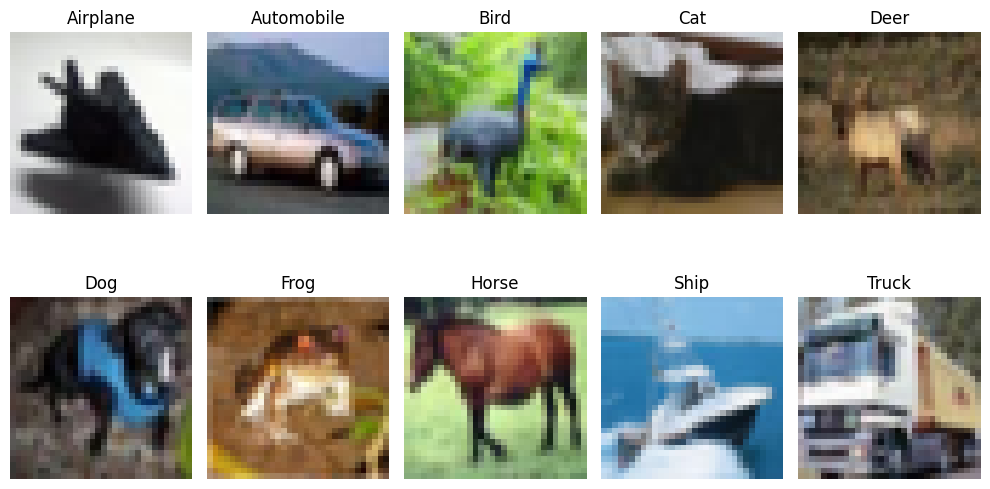

In [8]:
# Visualize Sample Image From each Class
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(10):
  idx = np.where(y_train == i)[0][0]
  image = x_train[idx]

  plt.subplot(2, 5, i+1)
  plt.imshow(image)
  plt.title(class_names[i])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Normalize Pixel Values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
# Convert lables to One-Hot Encoding
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [11]:
# Split dataset into train and Validation sets
from sklearn.model_selection import train_test_split

x_train_final, x_val, y_train_final, y_val = train_test_split(x_train, y_train_cat, test_size=0.2, random_state=42)

In [12]:
x_train_final.shape, y_val.shape

((40000, 32, 32, 3), (10000, 10))

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
# Data Augmentation using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [15]:
datagen.fit(x_train_final)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

In [17]:
# Define the CNN Model

from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,802 (1.61 MB)

 Trainable params: 421,354 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0005)

model.compile(
    optimizer=opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights= True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [21]:
# Train the Model with 'model.fit()' Data Augmentation:

history = model.fit(
    datagen.flow(x_train_final, y_train_final, batch_size=64),
    epochs = 50,
    validation_data = (x_val, y_val),
    callbacks = [early_stop, checkpoint],
    steps_per_epoch = len(x_train_final) // 64
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.2364 - loss: 2.2049
Epoch 1: val_accuracy improved from -inf to 0.40790, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.2366 - loss: 2.2044 - val_accuracy: 0.4079 - val_loss: 1.6584
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4143 - loss: 1.5908
Epoch 2: val_accuracy improved from 0.40790 to 0.50470, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4143 - loss: 1.5907 - val_accuracy: 0.5047 - val_loss: 1.3317
Epoch 3/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4833 - loss: 1.4161
Epoch 3: val_accuracy improved from 0.50470 to 0.55250, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.4833 - loss: 1.4160 - val_accuracy: 0.5525 - val_loss: 1.2237
Epoch 4/50
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5369 - loss: 1.2940
Epoch 4: val_accuracy did not improve from

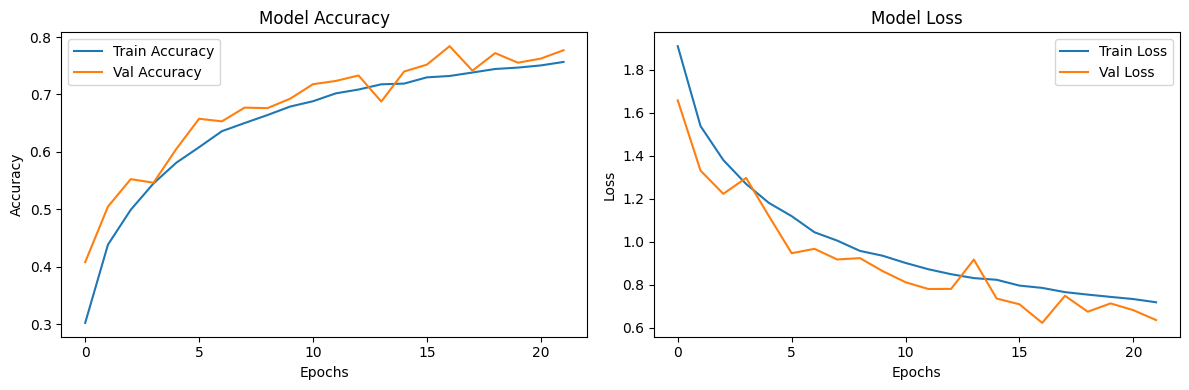

In [22]:
# Plot Training vs Validation Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = "Val Accuracy")
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = "Val Loss")
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Evaluate on test data
test_loss,test_acc = model.evaluate(x_test, y_test_cat, verbose = 2)

313/313 - 1s - 3ms/step - accuracy: 0.7844 - loss: 0.6432


In [24]:
test_acc, test_loss

(0.7843999862670898, 0.6432060599327087)

In [25]:
# predict on test data
import numpy as np

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [26]:
from sklearn.metrics import  confusion_matrix, classification_report

In [27]:
classification_report(y_true, y_pred, target_names = class_names)

'              precision    recall  f1-score   support\n\n    Airplane       0.79      0.79      0.79      1000\n  Automobile       0.91      0.91      0.91      1000\n        Bird       0.79      0.58      0.67      1000\n         Cat       0.70      0.52      0.60      1000\n        Deer       0.73      0.80      0.76      1000\n         Dog       0.76      0.68      0.71      1000\n        Frog       0.74      0.90      0.81      1000\n       Horse       0.81      0.85      0.83      1000\n        Ship       0.79      0.92      0.85      1000\n       Truck       0.82      0.91      0.86      1000\n\n    accuracy                           0.78     10000\n   macro avg       0.78      0.78      0.78     10000\nweighted avg       0.78      0.78      0.78     10000\n'

In [28]:
cm = confusion_matrix(y_true, y_pred)

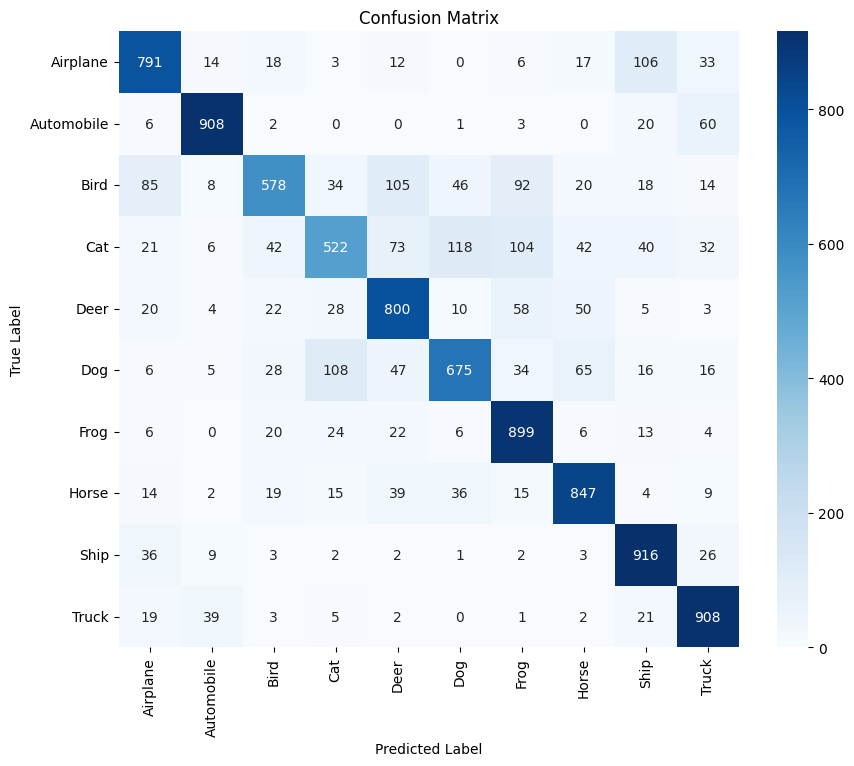

In [29]:
# Plot Confusion Matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Transfer Learning for CIFAR-10

In [30]:
BATCH_SIZE = 32

def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image, label

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train_cat))
train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test_cat))
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [31]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load VGG16 base model
vgg_base = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
vgg_base.trainable = False  # Freeze all VGG16 layers


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
model = models.Sequential([
    vgg_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])


In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 325s 198ms/step - accuracy: 0.0998 - loss: 2.3771 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 299s 192ms/step - accuracy: 0.0946 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 299s 192ms/step - accuracy: 0.0947 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 192ms/step - accuracy: 0.0950 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 299s 192ms/step - accuracy: 0.0950 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 300s 192ms/step - accuracy: 0.0950 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 191ms/step - accuracy: 0.0950 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 300s 192ms/step - ac

In [35]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 158ms/step - accuracy: 0.0975 - loss: 2.3027
Test Accuracy: 0.1000


In [36]:
# Save the model

model.save("cifar10_cnn_model.keras")

In [41]:
# Loas the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model("best_model.keras")

In [42]:
loss, acc = loaded_model.evaluate(x_test, y_test_cat, verbose=0)
loss, acc

(0.6432060599327087, 0.7843999862670898)

In [43]:
# predict first image

sample_image = np.expand_dims(x_test[0], axis=0)  # Add batch dimension
prediction = loaded_model.predict(sample_image)
predicted_class = np.argmax(prediction)

print(f"Predicted class: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step
Predicted class: Cat
